In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import metrics
    
df = pd.read_csv("C:\\Users\\Mouna\\OneDrive\\Pictures\\Desktop\\remade.csv")


df1 = df.copy(deep=True)
df1 = df1.drop(['index','the_geom','the_geom_webmercator','cartodb_id','rw_country_code','rw_country_name','country',
                'cri_rank','fatalities_per_100k_rank','fatalities_rank','losses_per_gdp__rank','losses_usdm_ppp_rank',],axis=1)

df1

,cri_score,fatalities_per_100k_total,fatalities_total,losses_per_gdp__total,losses_usdm_ppp_total,world_label
0,72.50,0.45,140,0.0001,1.229,First
1,61.50,0.01,1,0.6746,2797.884,First
2,66.33,0.05,22,0.0394,637.070,First
3,124.50,0.00,0,NaN,0.000,Second
4,117.33,0.00,0,0.0021,0.508,Third
...,...,...,...,...,...,...
177,124.50,0.00,0,NaN,0.000,Third
178,124.50,0.00,0,NaN,0.000,Third
179,114.33,0.01,1,0.0012,0.130,Third
180,124.50,0.00,0,NaN,0.000,Third


In [24]:
df1["losses_per_gdp__total"].fillna(0,inplace=True)

In [25]:
X = df1.iloc[:,:4]
X

,cri_score,fatalities_per_100k_total,fatalities_total,losses_per_gdp__total
0,72.50,0.45,140,0.0001
1,61.50,0.01,1,0.6746
2,66.33,0.05,22,0.0394
3,124.50,0.00,0,0.0000
4,117.33,0.00,0,0.0021
...,...,...,...,...
177,124.50,0.00,0,0.0000
178,124.50,0.00,0,0.0000
179,114.33,0.01,1,0.0012
180,124.50,0.00,0,0.0000


In [26]:
y = df1.iloc[:,5]
y

0       First
1       First
2       First
3      Second
4       Third
        ...  
177     Third
178     Third
179     Third
180     Third
181     Third
Name: world_label, Length: 182, dtype: object

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [28]:
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [29]:
y_pred = knc.predict(X_test)
y_pred

array(['Third', 'Third', 'First', 'Third', 'Third', 'First', 'Third',
       'Third', 'Third', 'Second', 'First', 'Third', 'First', 'Second',
       'First', 'First', 'Second', 'First', 'Third'], dtype=object)

In [30]:
confusion_matrix(y_test,y_pred)

array([[3, 2, 1],
       [2, 0, 5],
       [2, 1, 3]], dtype=int64)

In [31]:
accuracy_score(y_test,y_pred)

0.3157894736842105

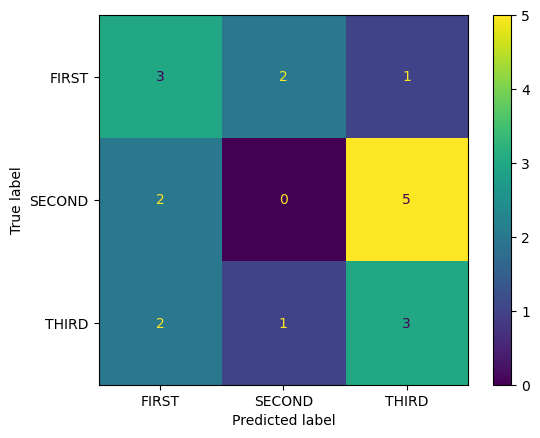

In [32]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix, display_labels=["FIRST","SECOND","THIRD"])
cm_display.plot()
plt.show()